# 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2. 데이터 이해

In [3]:
data.head(3)

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373


In [4]:
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [5]:
data.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


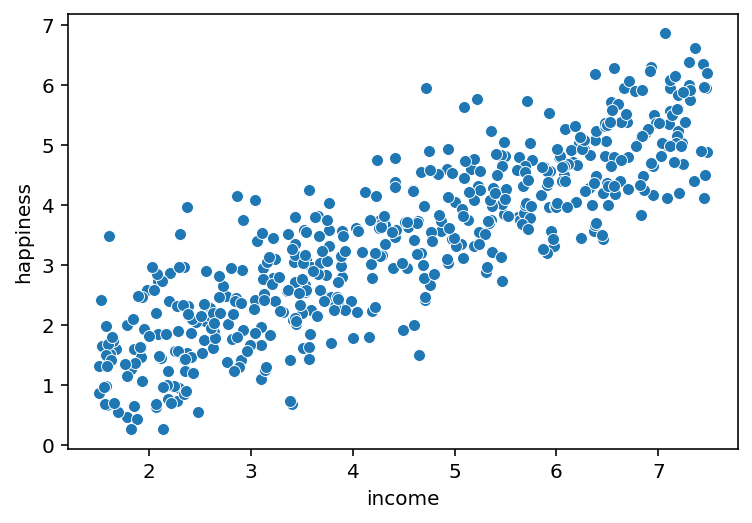

In [6]:
import seaborn as sns

sns.scatterplot(data=data, x='income', y='happiness')

plt.show()

# 3. 데이터 준비

#### 1) x,y 분리

In [7]:
target='happiness'

x = data.drop(target, axis=1)
y = data[target]

#### 2) train,test 분리

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=2022)

# 4. 모델링

In [9]:
# 1. 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
# 2. 선언하기
model = LinearRegression()

In [12]:
# 3. 학습하기
model.fit(x_train,y_train)

LinearRegression()

In [14]:
# 4. 예측하기
y_pred = model.predict(x_test)

#### 단순회귀 기울기, 절편 확인

In [15]:
print('기울기 :', model.coef_)
print('절편 :', model.intercept_)

기울기 : [0.7242665]
절편 : 0.15575776095537952


In [16]:
# 5. 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('R2-score :', r2_score(y_test,y_pred))

MAE : 0.5466885866485439
R2-score : 0.7756709291514665


#### 그래프로 확인하기

In [19]:
a = model.coef_
b = model.intercept_

x = np.linspace(x_test.min(), x_test.max(), 10)  
# x_test 최대, 최소 안에서 임의로 x 값을 10개 지정해줌

y = a*x+b

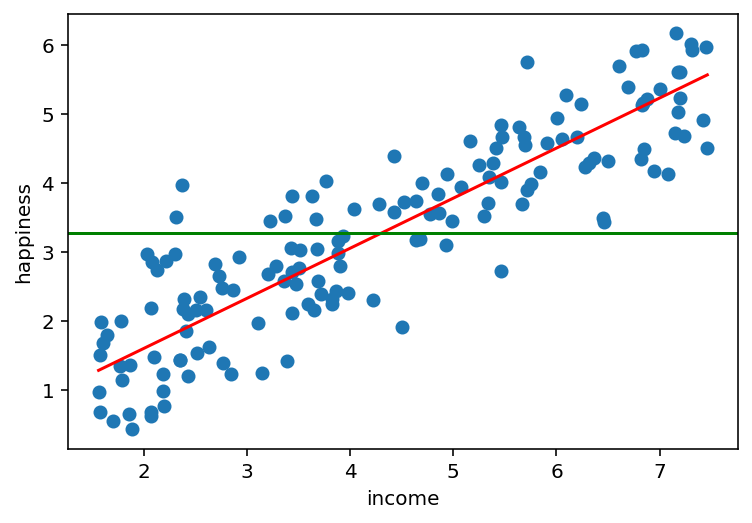

In [23]:
plt.scatter(x_test,y_test)
plt.plot(x,y, color='r')
plt.axhline(y_test.mean(), color='g')

plt.xlabel('income')
plt.ylabel('happiness')
plt.show()